In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

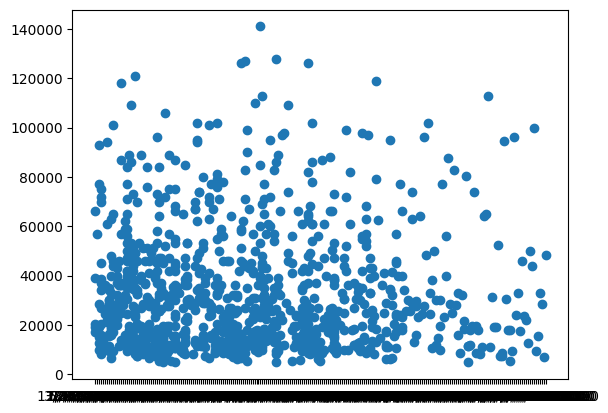

In [5]:
fig , ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

Text(0.5, 0, 'Price')

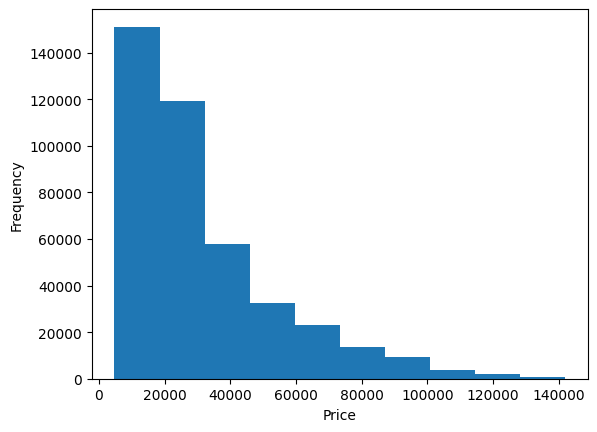

In [6]:
df.SalePrice.plot.hist()
plt.xlabel("Price")

### Prasing Dates
we do it while working with time series problem
tell pandas which column has dates

In [7]:
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory =False,parse_dates=["saledate"])

In [8]:
df.saledate.dtype

dtype('<M8[ns]')

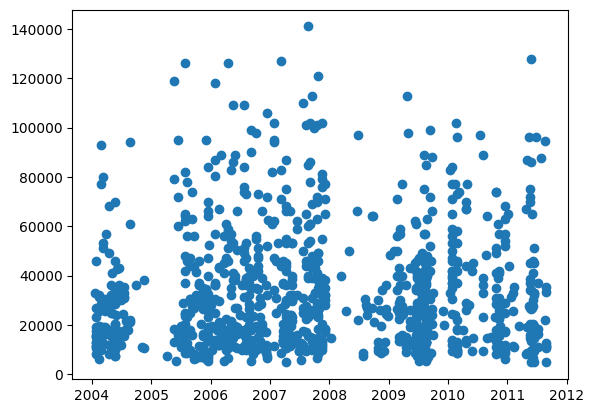

In [9]:
fig , ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [10]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sorting Data by date

In [11]:
df.sort_values(by=["saledate"],ascending=True,inplace=True)

In [12]:
#### Making copy of original data frame
df_temp = df.copy()

In [13]:
df_temp["saleyear"] = df_temp.saledate.dt.year
df_temp["salemonth"] = df_temp.saledate.dt.month
df_temp["saleday"] = df_temp.saledate.dt.day
df_temp["saledayofweek"] = df_temp.saledate.dt.dayofweek
df_temp["saledayofyear"] = df_temp.saledate.dt.dayofyear

In [14]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [15]:
df_temp.drop("saledate",axis=1,inplace=True)

In [16]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [17]:
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

## Refining Data 

### Convert String to catogories


In [18]:
for label , content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
              print (label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [19]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

False

In [20]:
df_temp.UsageBand.dtype

dtype('O')

In [21]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

False

In [22]:
for label , content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = df_temp[label].astype("category")

In [23]:
for label , content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = df_temp[label].astype("category")

In [24]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [25]:
df_temp.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

In [26]:
### Save preprocessed data
df_temp.to_csv("bluebook-for-bulldozers/train_temp.csv",index= False)

In [27]:
df_temp = pd.read_csv("bluebook-for-bulldozers/train_temp.csv",low_memory= False)

In [28]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"{label} Has missing values")

auctioneerID Has missing values
MachineHoursCurrentMeter Has missing values


In [29]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label+"_is_missing"] = pd.isnull(content)
            df_temp[label] = content.fillna(content.median())
            

In [30]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,Lever,NaN,NaN,1989,1,31,1,31,False,True


In [31]:
df_temp[df_temp["MachineHoursCurrentMeter_is_missing"] == 1].sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
60108,1755390,12000.0,1480527,166,132,10.0,1989,0.0,NaN,D21P-6,...,None or Unspecified,NaN,NaN,1997,11,19,2,323,False,True
81622,1495289,26000.0,1518870,3537,132,1.0,1993,0.0,NaN,416B,...,NaN,NaN,NaN,1999,6,24,3,175,False,True
3693,1671089,11000.0,1417825,8585,132,18.0,1980,0.0,NaN,555,...,NaN,NaN,NaN,1989,9,30,5,273,False,True
99040,1395458,88000.0,1548031,3415,132,1.0,1992,0.0,NaN,235C,...,NaN,NaN,NaN,2000,9,21,3,265,False,True
10338,1338283,30000.0,1411610,7259,132,1.0,1985,0.0,NaN,916,...,NaN,Standard,Conventional,1991,3,5,1,64,False,True


In [32]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [33]:
df_temp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [34]:
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [35]:
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label+"_is_misssing"]=pd.isnull(content)
        df_temp[label] = pd.Categorical(df_temp[label]).codes+1

In [36]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_misssing,False,True,False,True,False
Blade_Type_is_misssing,False,True,False,True,False
Travel_Controls_is_misssing,False,True,False,True,False
Differential_Type_is_misssing,True,False,True,False,True


In [37]:
df_temp.isna().sum()[:53]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

In [38]:
from sklearn.ensemble import RandomForestRegressor
%time
model = RandomForestRegressor( random_state = 42 , n_jobs=-1)
model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

CPU times: total: 0 ns
Wall time: 0 ns


RandomForestRegressor(n_jobs=-1, random_state=42)

In [39]:
model.score(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

0.9875468079970562

In [40]:
df_temp.saleyear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleyear, Length: 412698, dtype: int64

In [41]:
df_val = df_temp[df_temp.saleyear == 2012]
df_train = df_temp[df_temp.saleyear != 2012]

In [42]:
x_train , y_train = df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
x_val , y_val= df_val.drop("SalePrice",axis=1),df_val["SalePrice"]
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an Evaluation Function

### Create Evauluation function 

In [43]:
from sklearn.metrics import mean_squared_log_error , mean_absolute_error,r2_score
def rmsle(y_test,y_preds):
    """
    Calculates root mean squared log error
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
def showscores(model):
    train_preds = model.predict(x_train)
    val_preds   =  model.predict(x_val)
    scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
              "Valid MAE" : mean_absolute_error(y_val,val_preds),
              "Training RMSLE": rmsle(y_train,train_preds),
              "Valid RMSLE": rmsle(y_val,val_preds),
              "Training R^2": r2_score(y_train,train_preds),
              "Valid R^2": r2_score(y_val,val_preds)}
    return scores

## Testing our model on subsets(to tune hyper parameters

In [44]:
model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
%time

model.fit(x_train,y_train)

CPU times: total: 0 ns
Wall time: 0 ns


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [45]:
showscores(model)

{'Training MAE': np.float64(5561.2988092240585),
 'Valid MAE': np.float64(7177.26365505919),
 'Training RMSLE': np.float64(0.257745378256977),
 'Valid RMSLE': np.float64(0.29362638671089003),
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

## Hyperparameter tuning with Randomized search CV 

In [46]:
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {"n_estimators" : np.arange(10,100,1000),
           "max_depth" : [None ,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "max_features": [0.5,1,"sqrt","auto"],
           "max_samples": [10000]}
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state = 42),
                              param_distributions= rf_grid,
                             n_iter = 20,
                             cv=5,verbose=True)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\soham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\soham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\soham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\soham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10])},
                   verbose=True)

In [47]:
showscores(rs_model)

{'Training MAE': np.float64(6215.339279602901),
 'Valid MAE': np.float64(7749.57754977719),
 'Training RMSLE': np.float64(0.28212984733781904),
 'Valid RMSLE': np.float64(0.3186968612615537),
 'Training R^2': 0.8290335633781516,
 'Valid R^2': 0.808343450026006}

### Traning a model with the best hyperparameters

In [48]:
ideal_model = RandomForestRegressor(n_estimators= 40,
                                    min_samples_leaf =1,
                                    min_samples_split=14,
                                    max_features =0.5,
                                    n_jobs = -1 ,
                                    max_samples = None,
                                   random_state=42)
ideal_model.fit(x_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [49]:
showscores(ideal_model)

{'Training MAE': np.float64(2953.8161137163484),
 'Valid MAE': np.float64(5951.247761444453),
 'Training RMSLE': np.float64(0.14469006962371858),
 'Valid RMSLE': np.float64(0.24524163989538328),
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

## Make Predictions on test data 

In [50]:
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])



### Preprocessing Test Data

In [51]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleyear"] = df.saledate.dt.year
    df["salemonth"] = df.saledate.dt.month
    df["saleday"] = df.saledate.dt.day
    df["saledayofweek"] = df.saledate.dt.dayofweek
    df["saledayofyear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)
   
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_misssing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [52]:
df_test=preprocess_data(df_test)

In [53]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [54]:
set(x_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [55]:
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_misssing,Thumb_is_misssing,Pattern_Changer_is_misssing,Grouser_Type_is_misssing,Backhoe_Mounting_is_misssing,Blade_Type_is_misssing,Travel_Controls_is_misssing,Differential_Type_is_misssing,Steering_Controls_is_misssing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [56]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [57]:
# Ensure the test dataset has the same column order as the model expects
df_test = df_test[ideal_model.feature_names_in_]


In [58]:
test_preds = ideal_model.predict(df_test)

In [59]:
test_preds

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029])

In [60]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


In [61]:
df_preds.to_csv("bluebook-for-bulldozers/test_predictions_mine.csv", index = False )

## Feature Importance

In [62]:
ideal_model.feature_importances_


array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

### Function for plotting feature importance

In [68]:
def plot_features(columns,importances , n=20):
    df = (pd.DataFrame({"features" : columns , 
                        "feature_importances" : importances})
            .sort_values("feature_importances",ascending = False )
                 .reset_index(drop=True))
    fig , ax = plt.subplots()
    ax.barh(df["features"][:n] , df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

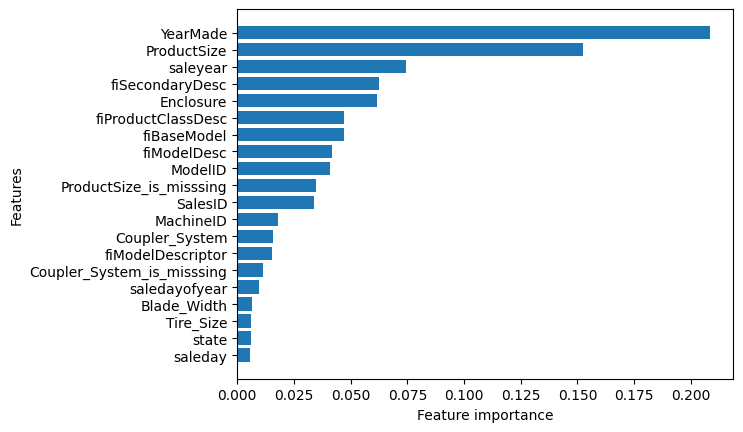

In [69]:
plot_features(x_train.columns,ideal_model.feature_importances_)